# Statistical Inferences into the Housing Development Industry

## Overview

For new companies to the housing development sector, it can be daunting to determine what direction to go in when starting out with building houses and selling them. Through a statistical analysis of housing data from Kings County, California, we can gain a general insight as to what features go into houses that sell within certain price ranges.

## Introduction

When building and selling houses,
- What kind of factors go into pricing houses?
- What makes one house more valuable than another?
- What should we look out for before we start building a house that will affect its value in the long run?


## Exploring the data

Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

Importing data

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Each row represents data for houses that were sold in Kings County, including the prices they sold at and various aspects of the houses and their conditions at the time of sale.

Checking for dupes and nulls

In [3]:
df.duplicated().sum()

0

In [4]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Checking correlations

In [5]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,0.011592,-0.023803,0.008188,-0.010799,0.021617,-0.012010,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.395734,0.036056,0.667951,0.605368,0.053953,0.129599,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.078523,0.026496,0.356563,0.479386,0.155670,0.018495,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,0.186451,-0.126479,0.665838,0.686668,0.507173,0.051050,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,0.282532,-0.059445,0.762779,0.876448,0.318152,0.055660,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,0.075298,-0.008830,0.114731,0.184139,0.052946,0.004513,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,0.028436,-0.264075,0.458794,0.523989,0.489193,0.003535,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.406654,0.017642,0.087383,0.075463,-0.026079,0.087244,0.031057,-0.012772,-0.039864,0.088860,0.032002
view,0.011592,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.406654,1.000000,0.045735,0.249727,0.166299,-0.054564,0.100964,0.085277,0.006141,-0.077894,0.279561,0.073332
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,0.045735,1.000000,-0.146896,-0.158904,-0.361592,-0.061858,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


Checking for multicollinearity

In [6]:
multi_df = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
multi_df['pairs'] = list(zip(multi_df.level_0, multi_df.level_1))
multi_df.set_index(['pairs'], inplace=True)
multi_df.drop(columns=['level_1', 'level_0'], inplace=True)

multi_df.columns = ['cc']
multi_df.drop_duplicates(inplace=True)
multi_df[(multi_df.cc>.75) & (multi_df.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(sqft_living, bathrooms)",0.755758


Our target variable is `price`.

Dropping variables and creating new df. Variables that were dropped were chosen for their low correlation with the target variable, indications of multicollinearity with other predictors, etc

In [100]:
housing_df = df.drop(['lat', 'long', 'sqft_living15', 'sqft_lot15', 
                      'zipcode', 'view', 'sqft_above', 'sqft_basement', 
                      'date', 'yr_renovated', 'waterfront'], axis = 1)

In [101]:
housing_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987


Changing `id` column to strings. Each house has its own unique ID, so it doesn't make sense to include it with the numerical data that will be used to perform statistical analysis.

In [102]:
housing_df['id'] = housing_df['id'].astype('str')

In [103]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  object 
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 1.6+ MB


Creating heat map and pairplot to find most useful features

In [104]:
corr_df = housing_df.corr()
corr_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.036056,0.667951,0.053953
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.026496,0.356563,0.155670
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,-0.126479,0.665838,0.507173
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,-0.059445,0.762779,0.318152
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.008830,0.114731,0.052946
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.264075,0.458794,0.489193
condition,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,1.000000,-0.146896,-0.361592
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,-0.146896,1.000000,0.447865
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,-0.361592,0.447865,1.000000


To show a visual of the correlations between `price` and other continuous variables in the dataset, I create a pairplot from a deviated dataframe containing only those variables, showing their scatterplots and histograms.

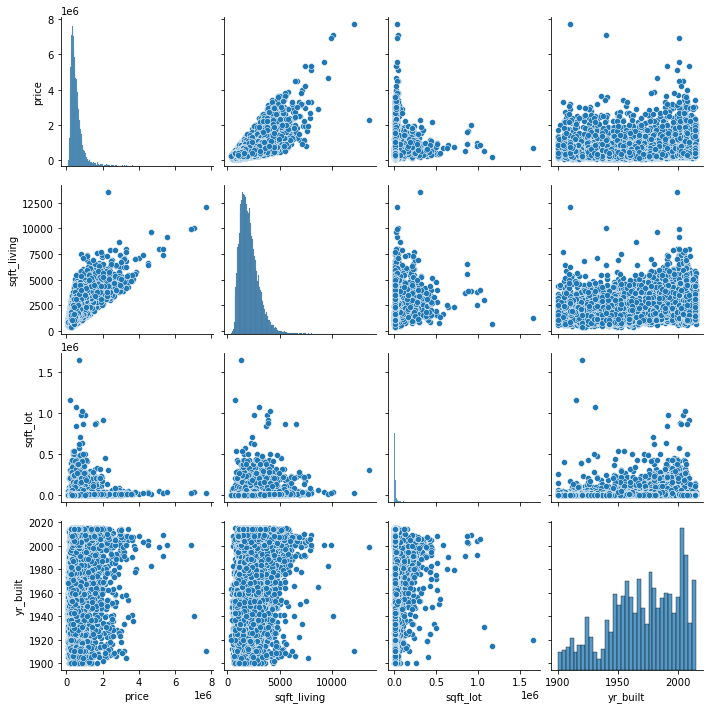

In [107]:
housing_continuous = housing_df[['price', 'sqft_living', 'sqft_lot', 'yr_built']]
sns.pairplot(housing_continuous)

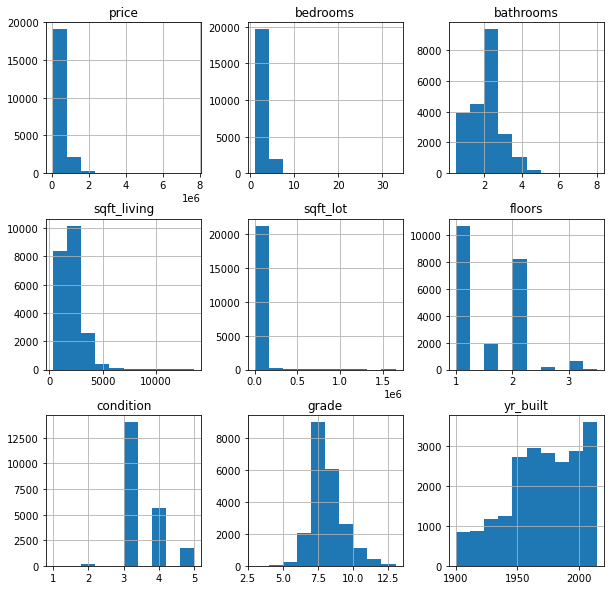

In [108]:
housing_df.hist(figsize=(10,10))
plt.show()

From the histograms produced from `housing_df`, an outstanding feature of the data is that our continous variables seem to be skewed and contain multiple outliers, which may cause errors in our analysis later on. To take care of this, we will have to remove outliers from our target variable and transform our predictors so that they have a more normal distribution.

I remove the outliers from `price` first so that we essentially have a cleaned dataframe to work with later when scaling the data:

In [109]:
z_scores = stats.zscore(housing_df.price)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
new_df = housing_df[filtered_entries]
new_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1955
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,1951
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,1933
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1965
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1987


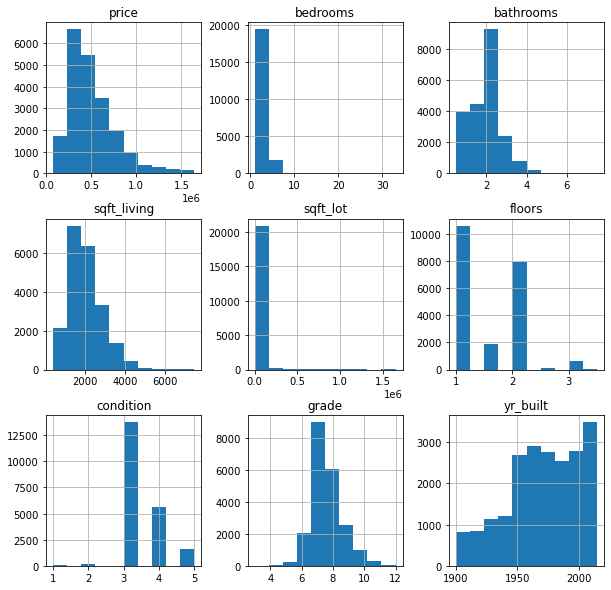

In [110]:
new_df.hist(figsize=(10,10))
plt.show()

I then log transform two continuous features, `sqft_living` and `sqft_lot`, and then scale them by using standardization so that our regression analysis doesn't become affected by extreme values.

<ipython-input-111-96354b0818b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[feat] = new_df[feat].map(lambda x: np.log(x))


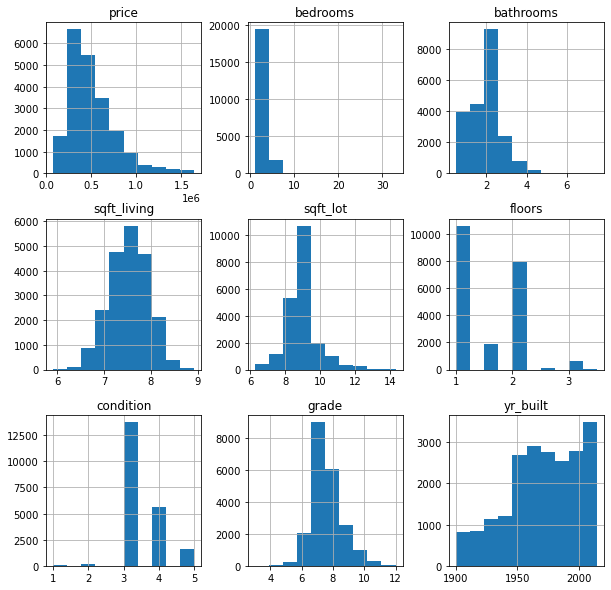

In [111]:
non_normal = new_df[['sqft_living', 'sqft_lot']]
for feat in non_normal:
    new_df[feat] = new_df[feat].map(lambda x: np.log(x))
new_df.hist(figsize=(10,10))
plt.show()

In [112]:
new_df['sqft_living'] = new_df['sqft_living'].map(lambda x: (x - new_df['sqft_living'].mean()) / new_df['sqft_living'].std())

<ipython-input-112-5511439d1c32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sqft_living'] = new_df['sqft_living'].map(lambda x: (x - new_df['sqft_living'].mean()) / new_df['sqft_living'].std())


In [113]:
new_df['sqft_lot'] = new_df['sqft_lot'].map(lambda x: (x - new_df['sqft_lot'].mean()) / new_df['sqft_lot'].std())

<ipython-input-113-4aac173fbb79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sqft_lot'] = new_df['sqft_lot'].map(lambda x: (x - new_df['sqft_lot'].mean()) / new_df['sqft_lot'].std())


In [114]:
new_df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built
0,7129300520,221900.0,3,1.00,-1.124885,-0.375587,1.0,3,7,1955
1,6414100192,538000.0,3,2.25,0.772925,-0.099188,2.0,3,7,1951
2,5631500400,180000.0,2,1.00,-2.165666,0.260100,1.0,3,6,1933
3,2487200875,604000.0,4,3.00,0.112289,-0.511667,1.0,5,7,1965
4,1954400510,510000.0,3,2.00,-0.263548,0.022726,1.0,3,8,1987


Now that we have no more outliers and our continuous variables have a more normal distribution, we can start building a regression model from our data! 

## Creating our first model

Since `sqft_lot` seems to have the highest correlation with `price`, our first model will only contain those variables.

In [115]:
fsm_df = new_df[['price', 'sqft_living']]
fsm_df.head()

,price,sqft_living
0,221900.0,-1.124885
1,538000.0,0.772925
2,180000.0,-2.165666
3,604000.0,0.112289
4,510000.0,-0.263548


In [116]:
formula = 'price ~ sqft_living'

In [117]:
def ols_analysis(df, formula):
    """
    Takes in a dataframe and a regression formula and creates a regression model
    of the data using OLS regression.
    """
    results = ols(formula=formula, data=new_df).fit()
    return results

In [118]:
fsm = ols_analysis(new_df, formula)
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                 1.357e+04
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        01:15:34   Log-Likelihood:            -2.8900e+05
No. Observations:               21191   AIC:                         5.780e+05
Df Residuals:                   21189   BIC:                         5.780e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.07e+05   1391.554    364.348      0.000    5.04e+05     5.1e+05
sqft_living  1.621e+05   1391.587    116.511      0.000    1.59e+05    1.65e+05
==============================================================================
Omnibus:                     3552.688   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6971.851
Skew:                           1.029   Prob(JB):                         0.00
Kurtosis:                       4.913   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
rsquared = fsm.rsquared
params = fsm.params

print(f'Rsquared of FSM: {rsquared}')
print('----------')
print('Beta values of FSM:')
print(params)

Rsquared of FSM: 0.390487072018985
----------
Beta values of FSM:
Intercept      507010.292011
sqft_living    162135.248767
dtype: float64


### Checking assumptions of linear regression

(explain assumptions of linear regression and why they need to be checked) To check the assumptions of linear regression, I have defined the following functions:

In [120]:
def linearity_test(model):
    """
    Takes a linear regression model and calculates the rainbow statistic and p-value
    to check if the model meets the assumption of linearity.
    """
    rainbow_statistic, rainbow_p_value = linear_rainbow(model)
    print("Rainbow statistic:", rainbow_statistic)
    print("Rainbow p-value:", rainbow_p_value)
    if rainbow_p_value > 0.05:
        print()
    
def normality_test(resids):
    """
    Takes the residuals of a linear regression model and creates a Q-Q
    plot to exhibit whether the model meets the assumption of normality.
    """
    fig = sm.graphics.qqplot(resids, dist=stats.norm, line='45', fit=True)
    fig.show()
    
def homoscadasticity(model, resids):
    """
    Takes in a linear regression model and its residuals and creates a scatter plot
    to help determine whether the model meets the assumption of homoscadasticity.
    """
    y_hat = model.predict()
    fig, ax = plt.subplots()
    resids = model.resid
    ax.set(xlabel="Predicted Price",
           ylabel="Residuals (Actual - Predicted Price")
    return ax.scatter(y_hat, resids);

def independence_test(df):
    """
    Takes in a dataframe for a linear regression model and returns a new dataframe
    containing the variance inflation factors for each feature in the model.
    """
    predictors_df = df.drop(df.columns[0], axis=1)
    rows = predictors_df.values
    vif_df = pd.DataFrame()
    vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(len(predictors_df.columns))]
    vif_df["feature"] = predictors_df.columns
    return vif_df

### 1. Linearity

In [121]:
linearity_test(fsm)

Rainbow statistic: 1.0031649073819695
Rainbow p-value: 0.4354090973343781



The null hypothesis is that the model is linearly predicted by the features, alternative hypothesis is that it is not. p-value is very low; at an alpha level of 0.05, we would reject the null, therefore this model violates the assumption of linearity

### 2. Normality

<ipython-input-120-66364aacd4a7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


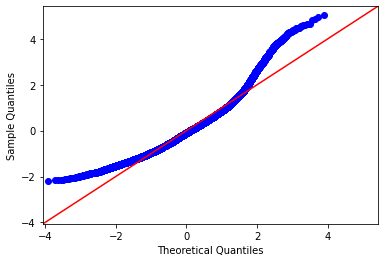

In [122]:
fsm_resids = fsm.resid
normality_test(fsm_resids)

The null hypothesis is that the residuals are normally distributed, alternative hypothesis is that they are not. The JB score p-value is low, thus we would reject the null, meaning that the residuals are not normally distributed. The Q-Q plot also reflects this, showing that the model is skewed.

### 3. Homoscadasticity

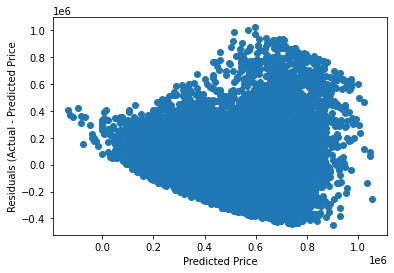

In [123]:
homoscadasticity(fsm, fsm_resids)

The scatter plot has a cone shape, indicating that the scatter of the dependent variable widens as the value of the independent variable increases.

In [124]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(fsm_resids, new_df[["sqft_living"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 1.761463818486578e-241


A low F-statistic means we would reject the null; therefore this model is heteroscedastic and violates the assumption of homoscedasticity.

### 4. Independence

The independence assumption means that the independent variables must not be too collinear.  Right now we have only one independent variable, so we don't need to check this yet.

## 2. Iterate: Build a better model - Add another numerical feature

In [125]:
housing_df['sqft_lot'].unique().sum()

208236234

In [126]:
model_2_df = new_df[['price', 'sqft_living', 'sqft_lot']]
model_2_df.head()

,price,sqft_living,sqft_lot
0,221900.0,-1.124885,-0.375587
1,538000.0,0.772925,-0.099188
2,180000.0,-2.165666,0.260100
3,604000.0,0.112289,-0.511667
4,510000.0,-0.263548,0.022726


In [127]:
model_2 = ols(formula="price ~ sqft_living + sqft_lot", data=model_2_df)
model_2_results = model_2.fit()

In [128]:
model_2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     6924.
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        01:15:34   Log-Likelihood:            -2.8891e+05
No. Observations:               21191   AIC:                         5.778e+05
Df Residuals:                   21188   BIC:                         5.779e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     5.07e+05   1386.135    365.773      0.000    5.04e+05     5.1e+05
sqft_living   1.68e+05   1458.281    115.196      0.000    1.65e+05    1.71e+05
sqft_lot    -1.884e+04   1458.281    -12.923      0.000   -2.17e+04    -1.6e+04
==============================================================================
Omnibus:                     3563.210   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7100.058
Skew:                           1.025   Prob(JB):                         0.00
Kurtosis:                       4.959   Cond. No.                         1.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking assumptions of linear regression for new model

### 1. Linearity

In [129]:
linearity_test(model_2_results)

Rainbow statistic: 1.0056090531874438
Rainbow p-value: 0.38673187205641973



### 2. Normality

<ipython-input-120-66364aacd4a7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


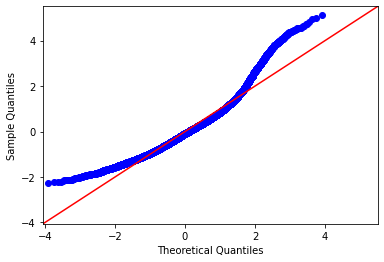

In [130]:
model_2_resids = model_2_results.resid
normality_test(model_2_resids)

### 3. Homoscadasticity

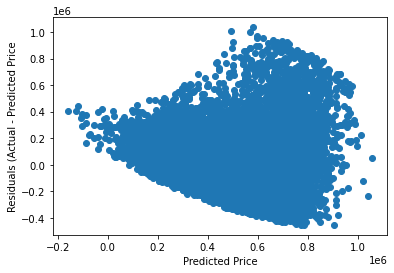

In [131]:
homoscadasticity(model_2_results, model_2_resids)

In [132]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(model_2_resids, model_2_df[["sqft_living", "sqft_lot"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 9.216496181933314e-241
F-statistic p-value: 1.6143404152529052e-245


### 4. Independence

In [133]:
independence_test(model_2_df)

,VIF,feature
0,1.106754,sqft_living
1,1.106754,sqft_lot


## 3. Iterate: Build a better model - Add a categorical feature


We have no variables in this data set that consist of raw categorical data, but we can consider `condition` as a categorical feature, assuming it represents the quality of a house's condition upon sale on a scale from 1 to 5. Because these are already numerical values, we won't have to create dummy variables to represent the data.

In [134]:
model_3_df = new_df[['price', 'sqft_living', 'sqft_lot', 'condition']]

In [135]:
model_3 = ols(formula="price ~ sqft_living + sqft_lot + condition", data=model_3_df)
model_3_results = model_3.fit()

In [136]:
model_3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     4736.
Date:                Sat, 01 May 2021   Prob (F-statistic):               0.00
Time:                        01:15:35   Log-Likelihood:            -2.8881e+05
No. Observations:               21191   AIC:                         5.776e+05
Df Residuals:                   21187   BIC:                         5.777e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    3.993e+05   7419.135     53.814      0.000    3.85e+05    4.14e+05
sqft_living  1.698e+05   1456.006    116.618      0.000    1.67e+05    1.73e+05
sqft_lot    -2.096e+04   1457.917    -14.379      0.000   -2.38e+04   -1.81e+04
condition    3.162e+04   2139.005     14.782      0.000    2.74e+04    3.58e+04
==============================================================================
Omnibus:                     3528.623   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7042.245
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       4.962   Cond. No.                         20.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking assumptions

1. Linearity

In [137]:
linearity_test(model_3_results)

Rainbow statistic: 1.0058776631015445
Rainbow p-value: 0.3814845886528299



2. Normality

<ipython-input-120-66364aacd4a7>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


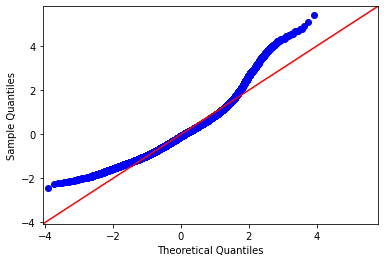

In [138]:
model_3_resids = model_3_results.resid
normality_test(model_3_resids)

3. Homoscadsticity

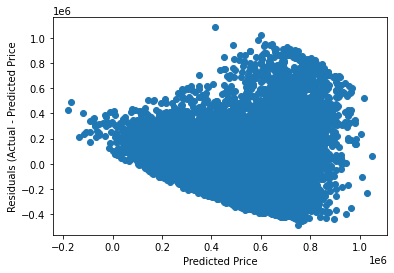

In [139]:
homoscadasticity(model_3_results, model_3_resids)

In [140]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(model_3_resids, model_3_df[["sqft_living", "sqft_lot", "condition"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 0.0
F-statistic p-value: 0.0


4. Independence

In [141]:
independence_test(model_3_df)

,VIF,feature
0,1.107026,sqft_living
1,1.107127,sqft_lot
2,1.000447,condition


## Conclusion

- Because our R-squared is so low, it only explains a minority of houses in general
- When using unfiltered data, we do get a higher R-squared, but keep in mind that means that there is more room for error

### What next?

- Regression analysis on more dense counties, since King County has a small population the data used in this analysis may not be as reliable as data from counties with more dense populations along with other factors like business